# Experiment: Suffix

In [2]:
import _pickle as pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [1]:
suffixes = {}
suffixes['deverbal'] = ['ance','ment','ant','ory','ive','ion','able','ably']
suffixes['denominal'] = ['ous','an','ic','ate','ary','hood','less','ish']
suffixes['deadjectival'] = ['ness','ity','en']

data = open('../data/en/train_input.txt','r').read().split()
counts = {i:0 for i in [item for sublist in suffixes.values() for item in sublist]}
for word in data:
    for suff in counts:
        if word.endswith(suff):
            counts[suff]+=1

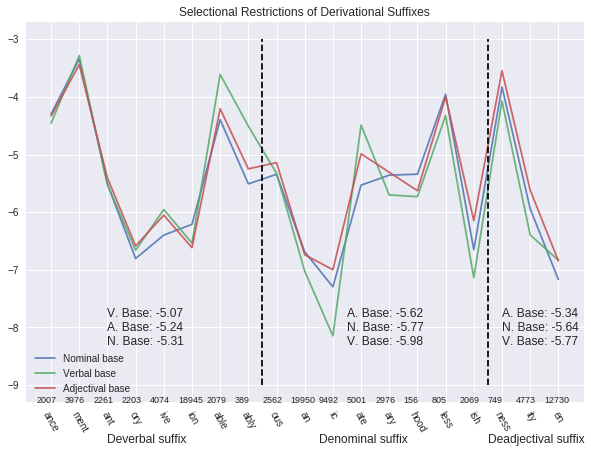

In [25]:
cat_suf = pickle.load(open('../results_dict/prob_suff_per_basecat_unamb_new','rb'))
cat_sufcat = pickle.load(open('../results_dict/prob_suffcat_per_basecat_unamb_new','rb'))
fig = plt.figure(figsize=(10,7))
for cat in cat_suf.keys():
        plt.plot(range(19), [cat_suf[cat][i][j] for i in cat_suf[cat].keys() for j in cat_suf[cat][i].keys()], alpha=0.85)
plt.xticks(range(19), [k for cat in cat_suf['NOUN'].keys() for k in cat_suf['NOUN'][cat].keys() ], rotation = -60)
plt.plot((7.5, 7.5), (-9, -3), 'k--')
plt.plot((15.5, 15.5), (-9, -3), 'k--')
for k in range(19):
    plt.annotate('{}'.format(counts[[k for cat in cat_suf['NOUN'].keys() for k in cat_suf['NOUN'][cat].keys() ][k]]),xy=(k-0.5,-9),xytext=(k-0.5,-9.3),fontsize=9)
plt.annotate('Deverbal suffix', xy=(2, -8), xytext=(2, -10))
plt.annotate('Denominal suffix', xy=(2, -8), xytext=(9.5, -10))
plt.annotate('Deadjectival suffix', xy=(2, -8), xytext=(15.5, -10))
plt.annotate('V. Base: {:.2f}\nA. Base: {:.2f}\nN. Base: {:.2f}'.format(cat_sufcat['VERB']['deverbal'],cat_sufcat['ADJ']['deverbal'],cat_sufcat['NOUN']['deverbal']), xy=(2, -7.8), xytext=(2, -8.3))
plt.annotate('A. Base: {:.2f}\nN. Base: {:.2f}\nV. Base: {:.2f}'.format(cat_sufcat['ADJ']['denominal'],cat_sufcat['NOUN']['denominal'],cat_sufcat['VERB']['denominal']), xy=(2, -7.8), xytext=(10.5, -8.3))
plt.annotate( 'A. Base: {:.2f}\nN. Base: {:.2f}\nV. Base: {:.2f}'.format(cat_sufcat['ADJ']['deadjectival'],cat_sufcat['NOUN']['deadjectival'],cat_sufcat['VERB']['deadjectival']), xy=(2, -7.8), xytext=(16, -8.3))
plt.legend([cat for cat in ['Nominal base','Verbal base','Adjectival base']])
plt.title('Selectional Restrictions of Derivational Suffixes')
plt.show()
fig.savefig('Selectional Restrictions of Derivational Suffixes_unambiguous suffxies.png')

Observation: Peaks at ment, able, less and ness. According to a productivity classification by https://csl.psychol.cam.ac.uk/publications/pdf/10_Ford_JML.pdf, which discusses 14 out of the 19 suffixes included in the experiment, ment, able, less, ness and ish classify as 'more' productive, while the rest fall under the category of 'less' productive suffixes. This linguistic fact appears to be captured in part in the relative probability of the suffixes and may explain the peaks observed in the plot. 

Another relatively large margin is observed for suffix -ish, with an adjectival base conditioning this suffix more strongly than other bases. Fabb 1988 lists -ish as a denominal suffix, which would make the observed ranking between bases incorrect from a linguistic perspective. More recently, however, -ish has grown in productivity and has expanded the range of bases it takes. https://csl.psychol.cam.ac.uk/publications/pdf/10_Ford_JML.pdf, for example, only pair -ish with adjectival bases in their study of base frequency effects on derivational morphology. In this sense, -ish could be considered a syntactically ambiguous suffix, whose comprehensive analysis would require information about the frequency of bases of different syntactic category, which is not available for the data used to train C2C.

Observations: Adjectival bases condition suffixes of all type more strongly on average than the other two types of bases. Patterns differ for the different suffixes even within the same category. -able and -ably are the only deverbal suffixes that show a clear preference for verbal bases. -ory, -ive and -ion prefer adjectival bases.Among denominal suffixes not a single one actually prefer nouns. The biggest margin we see in the graph is for the deadjectival -ity, which has a clear preference for an adjectival base.
Why are adjectival bases so popular? Is it just because a space is more likely after a verb and a noun and not after an adjective? If yes, why is that? Might be worth looking at the adjectives, nouns and verbs C2C generated.


Observation 1: Suffixes beginning with 'i' are always most likely following an adjectival base. 
Observation 2: The deadjectival suffix -ity is one of the more probable suffixes overall (5th in total), but only following an adjectival base. This suffix exhibits most strongly the behavior we could expect of all suffixes in a morphologically aware model.
My theory: -ity is very probable after an adjectival base. When C2C sees an 'i' after an adjectival base, it 'recognizes' that as the beginning of -ity and assigns the character a relatively high probability as compared to the probability of 'i' following a nominal or verbal base. Even when the following characters are not 't' and 'y' the margin created by 'i' in the context of an adjectival base pushes up the overall probability of any suffix beginnig with 'i' in that context.
Evidence: For -ive, for example, we get the following numbers for each character in an adjectival and verbal context: \[-6.61,-9.43,-0.41\]\[-9.01,-8.03,-0.15\]. So 'v' and 'e' are a less probable ending for a word derived from an adjective, than for a word derived from a verb, which is what we would expect, based on the fact -ive is a deverbal suffix. Yet, this is not reflected in the overall probability of the suffix in the two different contexts, due to interference from the highly probable -ity. The case is similar with -ish and -ic, which show a preference for their correct base past their initial 'i' character. 
What about -ion and -ify? Doesn't -ion mostly attach to already suffixed words and doesn't -ify change the base too much? Maybe that's why it is harder to learn anything about them.

# Novel Combinations of Real Prefixes with a Real Base 


## With Pefix Ambiguity (same results obtained without prefix ambiguity)

In [5]:
pref_cumm_6cat

NameError: name 'pref_cumm_6cat' is not defined

In [7]:
pref_cumm = pickle.load(open('../results_dict/results_cumm_Real_Real_unamb1_new','rb'))
pref_cumm_6cat = {i:{} for i in pref_cumm.keys()}
relevant = [b'NOUN',b'VERB',b'ADJ',b'ADV',b'PROPN']
for base_cat in pref_cumm.keys():
    for mod_cat in [b'NOUN',b'VERB',b'ADJ',b'ADV',b'PROPN']:
        pref_cumm_6cat[base_cat][mod_cat] = pref_cumm[base_cat][mod_cat]/sum(pref_cumm[base_cat].values())
new_dict = {i:[] for i in pref_cumm_6cat['NOUN'].keys()}
for item in pref_cumm_6cat.keys():
    for jtem in pref_cumm_6cat[item]:
        new_dict[jtem].append(pref_cumm_6cat[item][jtem])
fig = plt.figure(figsize=(7.5,7))
bottom_sum=[0,0,0]
for i,item in enumerate(new_dict.keys()):
    plt.bar(range(3),new_dict[item],0.6,bottom=bottom_sum, alpha=0.85)
    bottom_sum = [sum(x) for x in zip(bottom_sum, new_dict[item])]
plt.bar(range(3),[1-bottom_sum[0],1-bottom_sum[1],1-bottom_sum[2]],0.6,bottom=bottom_sum,alpha=0.85)
plt.xticks(range(4),['NOUN','VERB','ADJ',''])
plt.annotate('Base', xy=(0.5, 0.5), xytext=(0.9, -0.1))
plt.legend(['NOUN','VERB','ADJ','ADV','PROPN','other'],title = 'Prefixed form')
plt.title('Syntactic Category of Novel Combinations of Real Words with Real Pefixes')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results_dict/results_cumm_Real_Real_unamb_new'

## Proportion of Matching Tags per Prefix

In [17]:
softmax = pickle.load(open('../results_dict/softmax_Real_Real_unamb0','rb'))
softmax_un_NOUN = pickle.load(open('../results_dict/softmax_un_NOUN_Real_Real_unamb0','rb'))

In [5]:
averaged_ones = {i:[] for i in softmax.keys()}
for cat in softmax.keys():
    for pref in softmax[cat].keys():
        l = [list(i[0]) for i in softmax[cat][pref]]
        ls = [[0]*len(l[0]) for i in range(len(l))]
        for i in range(len(ls)):
            ls[i][l[i].index(np.max(l[i]))] =1
        averaged_ones[cat].append(np.mean(ls,axis=0))

In [18]:
averaged_ones_un_NOUN = {i:[] for i in softmax_un_NOUN.keys()}
for cat in softmax_un_NOUN.keys():
    for pref in softmax_un_NOUN[cat].keys():
        l = [list(i[0]) for i in softmax_un_NOUN[cat][pref]]
        ls = [[0]*len(l[0]) for i in range(len(l))]
        for i in range(len(ls)):
            ls[i][l[i].index(np.max(l[i]))] =1
        averaged_ones_un_NOUN[cat].append(np.mean(ls,axis=0))

In [26]:
tag_vocab.keys()

dict_keys([b'PROPN', b'PUNCT', b'ADJ', b'NOUN', b'VERB', b'DET', b'ADP', b'AUX', b'PRON', b'PART', b'SCONJ', b'NUM', b'ADV', b'CCONJ', b'X', b'INTJ', b'SYM', 'GO'])

In [29]:
averaged_ones_un_NOUN

{'ADJ': [array([ 0.06 ,  0.   ,  0.356,  0.48 ,  0.064,  0.   ,  0.   ,  0.   ,
          0.004,  0.   ,  0.   ,  0.   ,  0.028,  0.   ,  0.004,  0.004,
          0.   ,  0.   ])],
 'NOUN': [array([ 0.02341137,  0.        ,  0.09698997,  0.74247492,  0.10033445,
          0.00334448,  0.        ,  0.00668896,  0.00334448,  0.00334448,
          0.        ,  0.00668896,  0.00668896,  0.        ,  0.00334448,
          0.00334448,  0.        ,  0.        ])],
 'VERB': [array([ 0.01111111,  0.        ,  0.06296296,  0.15925926,  0.74074074,
          0.        ,  0.0037037 ,  0.00740741,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.0037037 ,
          0.01111111,  0.        ,  0.        ])]}

In [11]:
prefixes = ({'NOUN':['micro','macro','vice','arch','mini','maxi','counter','pre','sub','super','hyper','hypo','ultra','post','ante','pseudo','ex','multi','meta'],
                'VERB':['re','mis','out','over','under','up','down','counter','pre','un','in'],
                'ADJ':['anti','pro','extra','in','un','pre','sub','super','hyper','hypo','ultra','post','ante','pseudo','ex','multi','meta']})

In [12]:
data = open('../data/en/raw_english.txt','r').read().split()
tags = open('../data/en/tags_english.txt','r').read().split()
t2i,p2i = {},{i:{} for i in prefixes.keys()}
bla={}
for key in prefixes.keys():
    bla[key]= np.array([[0]*len(prefixes[key])]*5)

for t in ['PROPN','ADJ','NOUN','VERB','ADV']:
    t2i[t]=len(t2i)
for key in prefixes.keys():
    for p in prefixes[key]:
        p2i[key][p]=len(p2i[key])

for word,tag in zip(data,tags):
    for key in prefixes.keys():
        for p in prefixes[key]:
            if word.startswith(p) and tag in t2i.keys():
                bla[key][t2i[tag]][p2i[key][p]]+=1
            

In [25]:
tag_vocab = pickle.load(open('../data/en/tag_vocab.bin', 'rb'))
def filter_heatmap(ls):
    return [ls[i] for i in [0,2,3,4,12]]
def draw_heatmap_pref(cat,label,unamb,x1,x2,x3,mix1,mix2,main,mix3):
    fig = plt.figure(figsize=(10,7))
          
    sns.heatmap(filter_heatmap(np.array(averaged_ones[cat]).T),xticklabels=list(softmax[cat].keys()),vmin=0,vmax=1,cmap = 'Blues',annot = bla[cat],fmt='d', annot_kws = {'fontsize':9},yticklabels = filter_heatmap([i.decode() if type(i)!=str else i for i in tag_vocab.keys()]))
    plt.title('Syntactic Category of Novel Prefixed {}'.format(label))
    plt.xticks(rotation=-60)
    plt.plot((x1, x1), (0, 6), 'k--',alpha=0.5)
    plt.plot((x2, x2), (0, 6), 'k--',alpha=0.5)
    plt.plot((x3, x3), (0, 6), 'k--',alpha=0.5)
    plt.annotate(mix1, xy=(x1, 0), xytext=(0.1, 0.1),fontsize=9)
    plt.annotate(main, xy=(x2, 0), xytext=(x1+0.1, 0.1),fontsize=9)
    plt.annotate(mix2, xy=(x3, 0), xytext=(x2+0.1, 0.1),fontsize=9)
    plt.annotate(mix3, xy=(x3, 0), xytext=(x3+0.1, 0.1),fontsize=9)
    plt.show()
    fig.savefig('../plots/Syntactic Category of Novel Prefixed {} Unambig {}.png'.format(label,unamb))

In [16]:
np.array(averaged_ones['ADJ']).T[2]

array([ 0.356     ,  0.39759036,  0.388     ,  0.42386831,  0.58369099,
        0.384     ,  0.42741935,  0.432     ,  0.404     ,  0.316     ,
        0.452     ,  0.38554217,  0.356     ,  0.396     ,  0.31325301,
        0.46      ,  0.388     ])

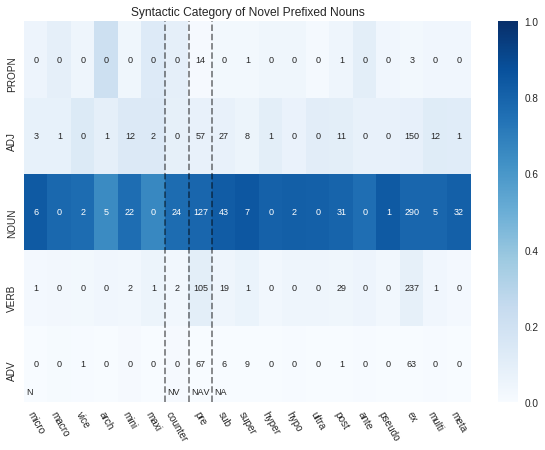

In [17]:
draw_heatmap_pref('NOUN','Nouns',0,6,7,8,'N','NAV','NV','NA')

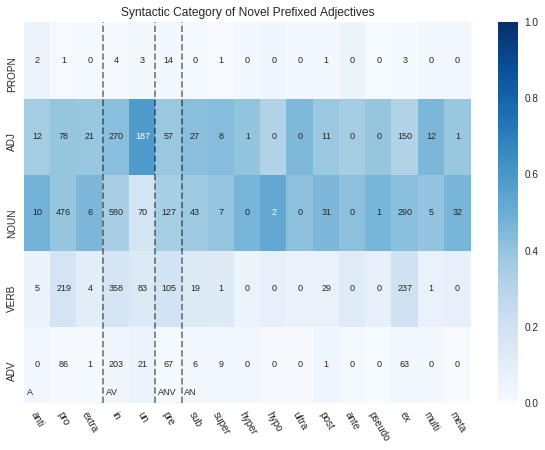

In [16]:
draw_heatmap_pref('ADJ','Adjectives',0,3,5,6,'A','ANV','AV','AN')

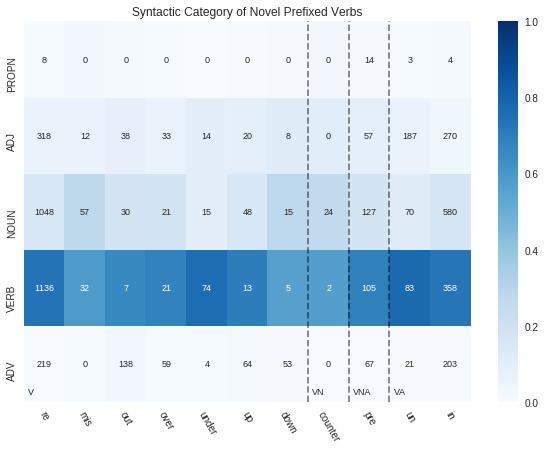

In [18]:
draw_heatmap_pref('VERB','Verbs',0,7,8,9,'V','VNA','VN','VA')

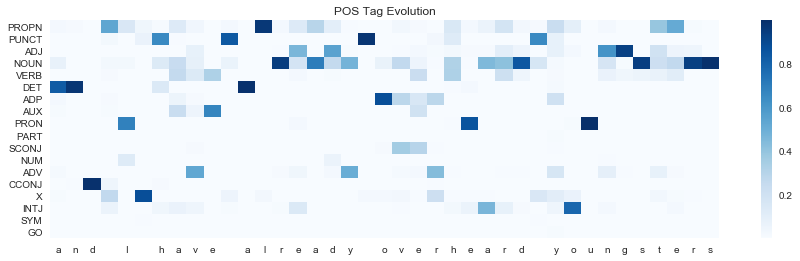

In [100]:
tag_vocab = pickle.load(open('../data/en/tag_vocab.bin', 'rb'))
tag_evolution = pickle.load(open('../results_dict/tag_evolution','rb'))
fig = plt.figure(figsize=(15,4))
sns.heatmap(np.array(tag_evolution['one']).T,xticklabels=list("and I have already overheard youngsters"),cmap = 'Blues',yticklabels = [i.decode() if type(i)!=str else i for i in tag_vocab.keys() ])
plt.title('POS Tag Evolution')
plt.show()
fig.savefig('POS tag evolution.png')

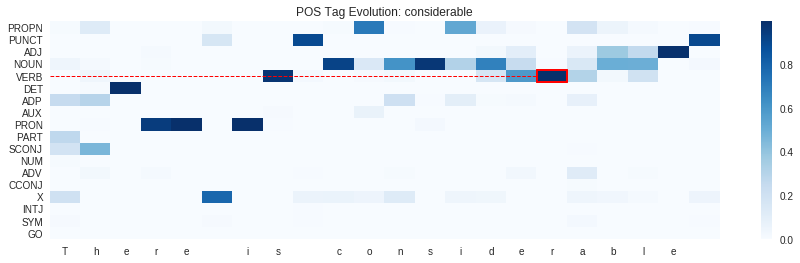

In [48]:
tag_vocab = pickle.load(open('../data/en/tag_vocab.bin', 'rb'))
tag_evolution = pickle.load(open('../results_dict/tag_evolution_considerable','rb'))
fig = plt.figure(figsize=(15,4))
sns.heatmap(np.array(tag_evolution['one']).T,xticklabels=list("There is considerable "),cmap = 'Blues',yticklabels = [i.decode() if type(i)!=str else i for i in tag_vocab.keys() ])
plt.title('POS Tag Evolution: considerable')
plt.plot((16, 16), (13, 14), 'r',linewidth=2)
plt.plot((17, 17), (13, 14), 'r',linewidth=2)
plt.plot((16, 17), (13, 13), 'r',linewidth=2)
plt.plot((16, 17), (14, 14), 'r',linewidth=2)
plt.plot((0, 16), (13.5, 13.5), 'r--',linewidth=1)
plt.show()
fig.savefig('POS tag evolution considerable.png')

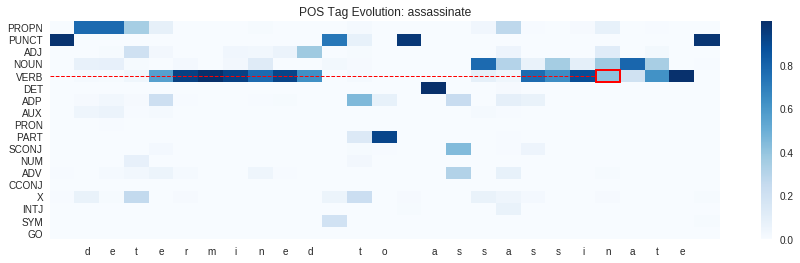

In [50]:
tag_vocab = pickle.load(open('../data/en/tag_vocab.bin', 'rb'))
tag_evolution = pickle.load(open('../results_dict/tag_evolution_assassinate','rb'))
fig = plt.figure(figsize=(15,4))
sns.heatmap(np.array(tag_evolution['one']).T,xticklabels=list(" determined to assassinate "),cmap = 'Blues',yticklabels = [i.decode() if type(i)!=str else i for i in tag_vocab.keys() ])
plt.title('POS Tag Evolution: assassinate')
plt.plot((22, 22), (13, 14), 'r',linewidth=2)
plt.plot((23, 23), (13, 14), 'r',linewidth=2)
plt.plot((22, 23), (13, 13), 'r',linewidth=2)
plt.plot((22, 23), (14, 14), 'r',linewidth=2)
plt.plot((0, 22), (13.5, 13.5), 'r--',linewidth=1)
plt.show()
fig.savefig('POS tag evolution assassinate.png')

# Notes

Observation: patterns are very similar across syntactic groupings of real prefixes. Is it just a property of bases that don't change category regardless of what precedes them? 
39.4% overlap in the words that retained tag NOUN with 'maxi' and with other denominal prefixes, 25.2% overlap across verbs with 'mis' and with other prefixes, and 34% overlap between ADJ with 'pro' and the other two deadjectival prefixes. 
Conclusion: it isn't just an effect of the base. 

